In [1]:
%matplotlib inline

# 2.3 神经网络简介

目前使用最广泛的定义是Kohonen于1988年的描述，神经网络是由具有适应性的简单单元组成的广泛并行互连的网络，
能够模拟生物神经系统对真实世界物体做出的交互反应。

## 概述
生物神经网络中，每个神经元与其他神经元相连。当它兴奋时，就向相连神经元发送化学物质，改变这些神经元的电位。如果某神经元的电位超过阈值就会激活，兴奋起来并向其他神经元发送化学物质。

深度学习借鉴这样的结构，每一个神经元接受输入x，通过带权重w的连接进行传递。
将总输入信号与神经元阈值比较，通过激活函数确定是否激活，将激活后的结果y输出，训练的就是权重w。

[参考](http://www.dkriesel.com/en/science/neural_networks)

每一个神经元的结构如下：
<img src="6.png" width=300>

[来源](https://becominghuman.ai/from-perceptron-to-deep-neural-nets-504b8ff616e)

## 神经网络的表示
将神经元拼接起来，**两层神经元**即输入层+输出层(M-P神经元)，构成**感知机**。
**多层神经元**相连构成神经网络，输入层与输出层间的所有层称为**隐藏层**：

<img src="7.png" width=300>

输入层和输出层只有一个，中间的隐藏层可以有很多层（输出层也可以多个，例如经典的GoogLeNet）

## 激活函数

神经元对化学物质的刺激反应，达到一定程度时神经元才会兴奋，并向其他神经元发送信息。
神经网络的激活函数，就是用来判断所计算的信息是否达到往后传输的条件。

### 为什么激活函数都是非线性的

神经网络的计算过程中，每层相当于矩阵相乘，无论神经网络有多少层输出，都是输入的**线性组合**。
就算有几千层，无非还是矩阵相乘，和一层矩阵相乘获得信息差距不大。
所以需要激活函数引入非线性因素，使得神经网络任意逼近任何非线性函数，
这样神经网络就可以应用到众多**非线性模型**，增加神经网络模型**泛化特性**。

早期神经网络主要采用**sigmoid**或者**tanh**，输出有界，很容易充当下一层的输入。 
近些年**Relu**及其改进型（如**Leaky-ReLU、P-ReLU、R-ReLU**等），由于计算简单、效果好，在多层神经网络应用较多。

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
x = torch.linspace(-10, 10, 60)
x.size()

torch.Size([60])

### sigmod 函数

$a=\frac{1}{1+e^{-z}}$ 导数 ：$a^\prime =a(1 - a)$

sigmod函数输出在开区间(0,1)，能够把输入连续实值变换为**0和1间**的输出。

如果是非常大的负数，输出就是0；如果是非常大的正数，输出就是1，起到抑制作用。

* sigmod进行**指数运算**（相比relu较慢）。
* 函数输出**不以0为中心**（权重更新效率降低），当输入稍微远离坐标原点，函数梯度变得很小（几乎为零）。神经网络反向传播不利于**权重优化**，这个问题叫做**梯度饱和**，也叫梯度弥散。
* 现在基本很少使用sigmod，只有二元分类（0，1）输出层才会使用。

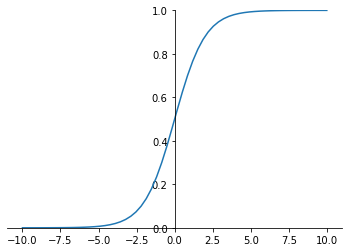

In [5]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.ylim((0, 1))
sigmod = torch.sigmoid(x)
plt.plot(x.numpy(), sigmod.numpy())

### tanh 函数
$a=\frac{e^z-e^{-z}}{e^z+e^{-z}}$ 

导数：$a^\prime =1 - a^2$ 

tanh是双曲正切，输出区间在(-1,1)间，整个函数**以0为中心**

与sigmoid类似，当输入稍微远离坐标原点，梯度会很小。
好在tanh以0为中心点，tanh作为激活函数起到归一化（均值为0）效果。

二分类问题中，**隐藏层**用tanh函数，**输出层**用sigmod函数，
但随着Relu出现,所有的隐藏层基本都用**relu**作为激活函数

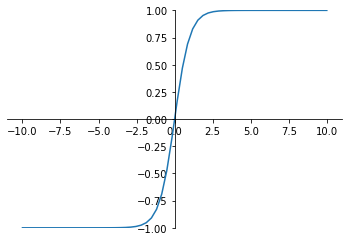

In [6]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.ylim((-1, 1))
tanh = torch.tanh(x)
plt.plot(x.numpy(), tanh.numpy())

### ReLU 函数

Relu（Rectified Linear Units）修正线性单元

$a=max(0,z)$ 导数大于0时1，小于0时0。

- z>0时，梯度始终为1，提高神经网络基于梯度算法的运算速度。
- z<0时，梯度一直为0。
- ReLU函数只有线性关系（只需判断输入是否大于0）。不管是前向传播还是反向传播，都比sigmod和tanh快很多。

输入是负数时，ReLU完全不被激活，一旦输入负数ReLU就会死掉。
反向传播过程中，输入负数梯度会完全到0，和sigmod函数、tanh函数有一样的问题。 实际运用中，该缺陷的影响不是很大。

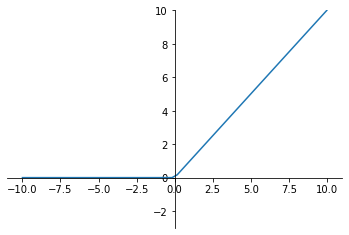

In [7]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.ylim((-3, 10))
relu = F.relu(x)
plt.plot(x.numpy(), relu.numpy())

### Leaky Relu 函数

为了解决relu函数z<0的问题，**Leaky ReLU**z<0时梯度仍然不为0。

ReLU前半段设为αz而非0，通常α=0.01 $ a=max(\alpha z,z)$

理论上讲，Leaky ReLU有ReLU的所有优点。但实际操作中，并没有完全证明Leaky ReLU总是好于ReLU。

ReLU目前仍是最常用的activation function，隐藏层中推荐优先尝试！

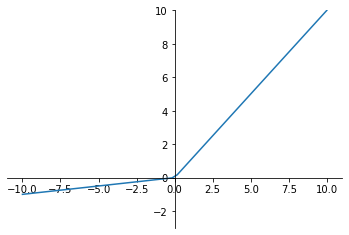

In [8]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.ylim((-3, 10))
# 这里0.1是为了方便展示，理论上应为0.01，甚至更小的值
l_relu = F.leaky_relu(x, 0.1)  
plt.plot(x.numpy(), l_relu.numpy())

## 深入理解前向传播和反向传播

最后再详细说下神经网络的**前向传播和反向传播**，继续使用吴恩达老师的板书
<img src="8.png" width=500>

### 正向传播

神经网络输入特征$a^{[0]}$。输入$x$，放入第一层计算。
第一层的激活函数用$a^{[1]}$表示，训练结果用$W^{[1]}$和$b^{[l]}$表示。
这两个值与计算结果$z^{[1]}$值都需要缓存，计算结果通过激活函数，生成激活后的$a^{[1]}$，即第一层的输出值。

这个值会作为第二层输入传到第二层，第二层要用$W^{[2]}$和$b^{[2]}$，计算结果为$z^{[2]}$，第二层的激活函数$a^{[2]}$。

后面几层以此类推，直到最后算出$a^{[L]}$，第$L$层的最终输出值$\hat{y}$，即网络预测值。

正向传播就是输入$x$通过一系列的网络计算，得到$\hat{y}$的过程。

过程里的缓存值，后面反向传播会用到。

### 反向传播

反向传播，就是对正向传播的一系列**反向迭代**。通过**反向计算梯度**，优化需要训练的$W$和$b$。

对${\delta}a^{[l]}$值求导, 得到${\delta}a^{[l-1]}$。
以此类推直到得到${\delta}a^{[2]}$和${\delta}a^{[1]}$。

反向传播输出 ${\delta}W^{[l]}$和${\delta}b^{[l]}$。
这一步已经得到权重的变化量，通过学习率对训练的$W$和$b$进行更新，

$W=W-\alpha{\delta}W $

$b=b-\alpha{\delta}b $

这样反向传播完成。